# 1) Introduction
## Dataset Description
### Overview
#### The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)
- The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

- We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
### Variable Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# 2) Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
print('Import the library successfully')

Import the library successfully


In [2]:
train_df = pd.read_csv("train.csv", index_col = 'PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("test.csv", index_col = 'PassengerId')
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.shape

(891, 11)

In [5]:
test_df.shape

(418, 10)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
train_df.duplicated().sum()

0

In [9]:
test_df.duplicated().sum()

0

In [10]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# Point to be noted
- The train Dataset has Rows: 891 and Columns:11
- The test Dataset has Rows: 418 and Columns:10
- The train Dataset has 3 types of columns:
  + Categorical: Survived, Pclass, Sex, SibSp, Parch, Embarked
  + Numerical: Age, Fare
  + Object: Name, Ticket, Cabin
- The test Dataset has 3 types of columns:
  + Categorical: Pclass, Sex, SibSp, Parch, Embarked
  + Numerical: Age, Fare
  + Object: Name, Ticket, Cabin
- The train Dataset has Missing values in Age (177) and Cabin (687)
- The test Dataset has Missing values in Age (86) and Cabin (327)
- The train Dataset has no duplicates
- The test Dataset has no duplicates

# 3) Exploratory Data Analysis

In [12]:
# Defining funtion to convert types of columns
def convert(dataframe, cols):
    for c in cols:
        dataframe[c] = dataframe[c].astype('category')

In [13]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
convert(train_df, cols)
convert(test_df, cols)
print(train_df.dtypes)
print(test_df.dtypes)

Survived       int64
Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object
Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object


In [14]:
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Survived'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [16]:
test_df.describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [17]:
train_df.describe(include = 'category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


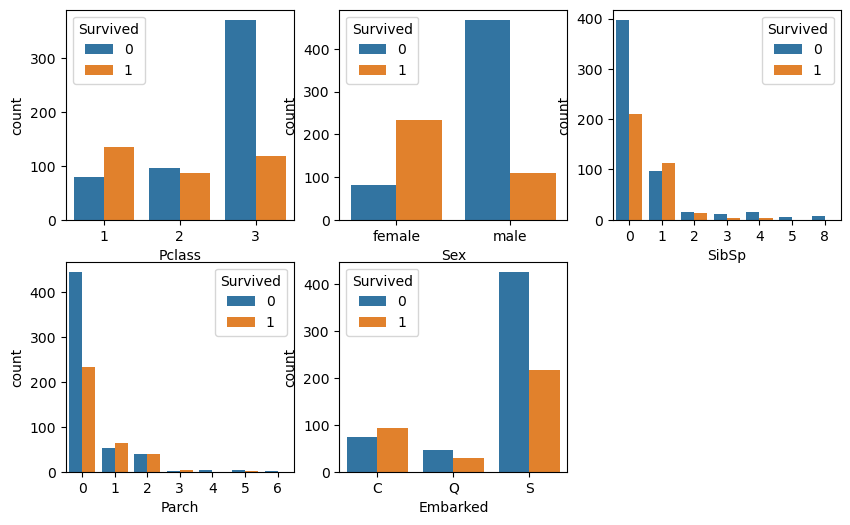

In [18]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(2, 3, figsize = (10,6))
for j in range(2):
    for i, col in enumerate(columns[j*3:j*3 + 3]):
        if i < len(columns):
            sns.countplot(data=train_df, x = col, ax = axes[j, i], hue = 'Survived')
axes.flat[-1].set_visible(False)
plt.show()    

- 1st Pclass highter survival rate
- surival rate's female > male
- Most people embarked on Southamton, also had the highter people not survival
- SibSP 0 were mostly not survived
- Parch 0 were mostly not survived

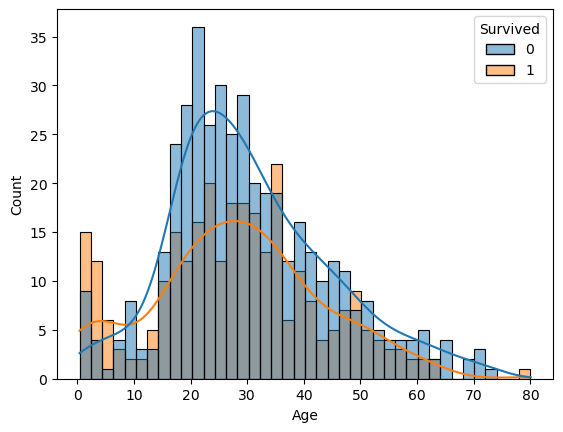

In [19]:
sns.histplot(data=train_df, x='Age', bins = 40, hue = 'Survived', kde = True)

plt.show()

- majorrity passenger were about 20-40 age
- Children had more change survive than other ages

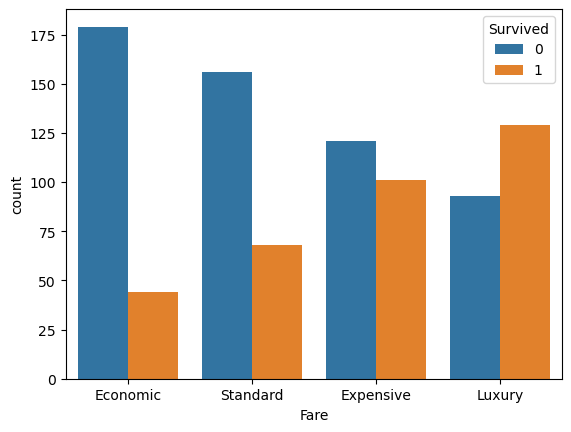

In [20]:
fare_category = ['Economic', 'Standard', 'Expensive', 'Luxury' ]
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_category)
sns.countplot(x = quartile_data, hue = train_df['Survived'])
plt.show()

- Fare Luxury are mostly survived

# 4)  Feature Engineering & Data Wrangling
## 4.1)  Feature Engineering

In [21]:
import re
def extract_title(name):
    title = re.search(r", ([\w\s]+)\.", name)
    return title.groups()[0].strip()

In [22]:
extract_title('tran thanh tuyen, mr. abc')

'mr'

In [23]:
train_df['Title'] = train_df['Name'].apply(lambda x: extract_title(x))

train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [24]:
test_df['Title'] = test_df['Name'].apply(lambda x: extract_title(x))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [25]:
def group_title(title):
    if title in ['Mr', "Miss", 'Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Other'

In [26]:
train_df['Title'] = train_df['Title'].apply(lambda x: group_title(x))
test_df['Title'] = test_df['Title'].apply(lambda x: group_title(x))

<Axes: xlabel='Title', ylabel='count'>

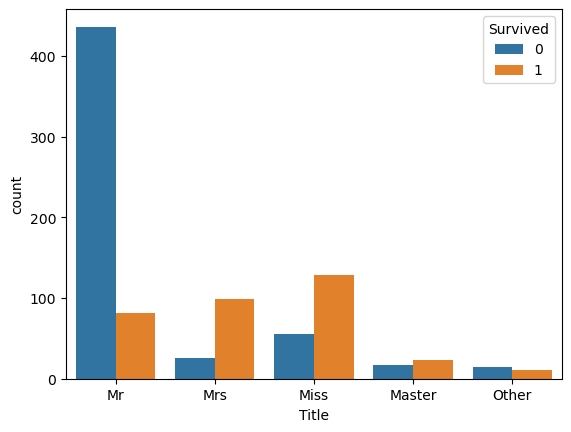

In [27]:
sns.countplot(data = train_df, x='Title', hue = 'Survived')

- Title Miss highter survived

### Family
- SibSp, Parch

In [28]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [29]:
train_df['Family_category']=pd.cut(train_df['Family_size'], bins=[0,1,4,8,11], labels=['Solo','Small',"Medium",'Large'])
test_df['Family_category']=pd.cut(test_df['Family_size'], bins=[0,1,4,8,11], labels=['Solo','Small',"Medium",'Large'])

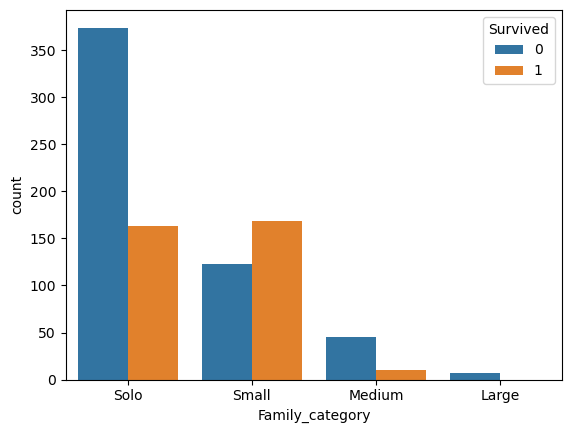

In [30]:
sns.countplot(data=train_df, x='Family_category', hue = 'Survived');

- Solo and Small size highter survived

## 4.2)  Data Wrangling

In [31]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_size          0
Family_category      0
dtype: int64
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
Title                0
Family_size          0
Family_category      0
dtype: int64


In [32]:
# defining funtion to check missing value
def check_missingvalue(df, feature):
    n_row = len(df)
    for col in feature:
        count_missingvalue = df[col].isnull().sum()
        if count_missingvalue > 0:
            print(f"{col} had {count_missingvalue/ n_row*100:.2f} missing value")        
            

In [33]:
num_feature = ['Age', 'Fare']
cat_feature = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_category']
feature = num_feature + cat_feature
print(feature)

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_category']


In [34]:
check_missingvalue(train_df, feature)
check_missingvalue(test_df, feature)

Age had 19.87 missing value
Embarked had 0.22 missing value
Age had 20.57 missing value
Fare had 0.24 missing value


In [35]:
train_median_age = train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
test_median_age = test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median')

In [36]:
train_df['Age'] = train_df['Age'].fillna(train_median_age)
test_df['Age'] = test_df['Age'].fillna(test_median_age)

In [37]:
check_missingvalue(train_df, feature)
check_missingvalue(test_df, feature)

Embarked had 0.22 missing value
Fare had 0.24 missing value


In [38]:
train_Embarked_mode = train_df['Embarked'].mode()[0]
test_Embarked_mode = test_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(train_Embarked_mode)
test_df['Embarked'] = test_df['Embarked'].fillna(test_Embarked_mode)

In [39]:
train_fare_median = train_df['Fare'].median()
test_fare_median = test_df['Fare'].median()
train_df['Fare'] = train_df['Fare'].fillna(train_fare_median)
test_df['Fare'] = test_df['Fare'].fillna(test_fare_median)

In [40]:
check_missingvalue(train_df, feature)
check_missingvalue(test_df, feature)

## Data has cleaned _________________________

In [41]:
train_df[feature].head(2)

,Age,Fare,Pclass,Sex,Embarked,Title,Family_category
PassengerId,,,,,,,
1,22.0,7.2500,3,male,S,Mr,Small
2,38.0,71.2833,1,female,C,Mrs,Small


### Data Proprecessing

In [42]:
X = pd.get_dummies(train_df[feature], columns = cat_feature, dtype = int).values
X_test = pd.get_dummies(test_df[feature], columns = cat_feature, dtype = int).values
y = train_df['Survived']
X_test[0:3]

array([[34.5   ,  7.8292,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ],
       [47.    ,  7.    ,  0.    ,  0.    ,  1.    ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
       [62.    ,  9.6875,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ]])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[:, 0:2] = scaler.fit_transform(X[:, 0:2])
X[0:3,0:2]

array([[-0.53489116, -0.50244517],
       [ 0.66839176,  0.78684529],
       [-0.23407043, -0.48885426]])

In [44]:
X.shape

(891, 19)

# 5) Model Training

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [46]:
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_val: {X_val.shape} y_val: {y_val.shape}")

X_train: (712, 19) y_train: (712,)
X_val: (179, 19) y_val: (179,)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, jaccard_score, log_loss
LR = LogisticRegression(solver='liblinear', max_iter=1000)
LR.fit(X_train, y_train)
LR

LogisticRegression(max_iter=1000, solver='liblinear')

In [48]:
y_hat = LR.predict(X_val)
y_hat

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [49]:
yhat_pro = LR.predict_proba(X_val)
yhat_pro[0:5]

array([[0.90687294, 0.09312706],
       [0.36962529, 0.63037471],
       [0.16573873, 0.83426127],
       [0.65323085, 0.34676915],
       [0.84067663, 0.15932337]])

### Evaluation

In [50]:
jaccard_score(y_val, y_hat, pos_label=0)

0.7603305785123967

In [51]:
LR.score(X_val, y_val)

0.8379888268156425

In [52]:
print(classification_report(y_val, y_hat))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       100
           1       0.88      0.73      0.80        79

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



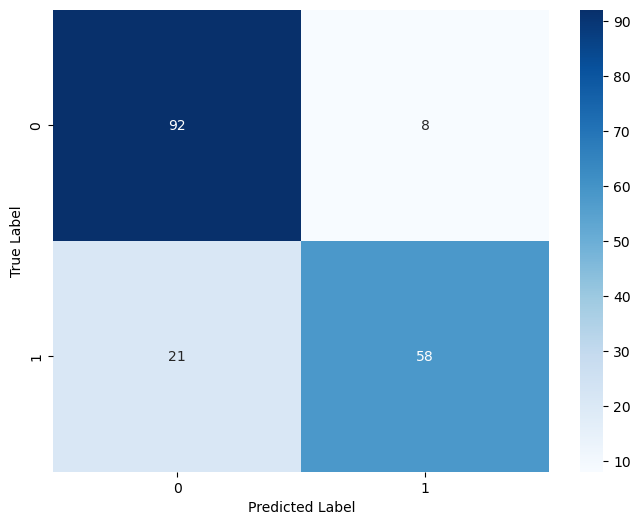

In [53]:
cm = confusion_matrix(y_val, y_hat)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
log_loss(y_val, yhat_pro)

0.41593433313044587

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_train_poly

array([[ 1.        , -0.68530153, -0.50286397, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.91091708, -0.35730831, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.76050671,  0.42073024, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.61009635, -0.48885426, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.81880212,  0.14891196, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.83571189,  4.6344169 , ...,  1.        ,
         0.        ,  0.        ]])

In [56]:
LR_poly = LogisticRegression(solver='liblinear', max_iter=1000)
LR_poly.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [57]:
LR_poly.predict(X_val_poly)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [58]:
LR_poly.score(X_val_poly, y_val)

0.8268156424581006

### Base model comparison

In [59]:
#!pip install xgboost

In [60]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [61]:
seed = 2024
models = [
    LinearSVC(random_state = seed, dual=True, max_iter = 5000),
    SVC(random_state=seed),
    DecisionTreeClassifier(random_state = seed),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(solver='liblinear', max_iter=5000),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state=seed)
]

In [62]:
from sklearn.model_selection import StratifiedKFold
def baseline_results(models, X, y, metrics, cv=5, plot_result = False):
    K_fold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=K_fold)
        for idx, score in enumerate(scores):
            entries.append((model_name, idx, score))
            
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_result:
        sns.boxplot(cv_df, x='model_name', y='accuracy_score')
        plt.xticks(rotation = 45)
        plt.show()
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    baseline_result = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_result.columns = ['Mean', 'Standard Deviation']
    baseline_result.sort_values(by=['Mean'], ascending = False, inplace = True)
    return baseline_result
    
baseline_results(models, X, y, metrics='accuracy', cv=5, plot_result = False)

,Mean,Standard Deviation
model_name,,
LogisticRegression,0.830557,0.027082
LinearSVC,0.829439,0.030381
SVC,0.827192,0.023957
KNeighborsClassifier,0.818222,0.030301
XGBClassifier,0.810370,0.031222
AdaBoostClassifier,0.808116,0.027558
RandomForestClassifier,0.806993,0.031120
ExtraTreesClassifier,0.787929,0.036043
DecisionTreeClassifier,0.763204,0.019752


In [68]:
y_pre = LR.predict(X_val)

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pre))

0.8379888268156425
